![](https://www.miskawaanhealth.com/wp-content/uploads/2021/05/chronic-kidney-disease-stages.jpg)

# Problem Statement
* According to **National Library of Medicine** study tells that 9 out of 10 people suffer from Chronic Kidney Disease.
* There are  many reasons for this hazardous problem counting few are:-
* Unhealthy diet and insufficient water drinking habits.
* No Proper Exercises and sleep.

## Ways to Solve and Help people.
* Ways to Easy and Early Detection by knowing simple health parmeters is by building a Machine learning model. People have enrusted machines for long time for their efficient and fast reply that makes them reliable.
* Here we build a fully **Automated Machine Learning model** solution to detect For **Chronic Kidney Disorder** with **Highest Confidence (least Human Error)**.
* **Saving** Lot of people.

In [1]:
# import necessary libraries like numpy, pandas, pyplot and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# reading dataset
chronic_df = pd.read_csv('kidney_disease.csv',index_col='id')
chronic_df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	

In [3]:
# rename column names to make it more user-friendly

chronic_df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [4]:
chronic_df.nunique()

age                         76
blood_pressure              10
specific_gravity             5
albumin                      6
sugar                        6
red_blood_cells              2
pus_cell                     2
pus_cell_clumps              2
bacteria                     2
blood_glucose_random       146
blood_urea                 118
serum_creatinine            84
sodium                      34
potassium                   40
haemoglobin                115
packed_cell_volume          44
white_blood_cell_count      92
red_blood_cell_count        49
hypertension                 2
diabetes_mellitus            5
coronary_artery_disease      3
appetite                     2
peda_edema                   2
aanemia                      2
class                        3
dtype: int64

In [5]:
chronic_df.sample().T

id,180
age,73.0
blood_pressure,90.0
specific_gravity,1.01
albumin,1.0
sugar,4.0
red_blood_cells,abnormal
pus_cell,abnormal
pus_cell_clumps,present
bacteria,notpresent
blood_glucose_random,234.0


In [6]:
# checking info of columns and null values

chronic_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## **`Dataset Description`**
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- 	bgr		-	blood glucose random
-			bu		-	blood urea
-			sc		-	serum creatinine
-			sod		-	sodium
-			pot		-	potassium
-			hemo		-	hemoglobin
-			pcv		-	packed cell volume
-			wc		-	white blood cell count
-			rc		-	red blood cell count
-			htn		-	hypertension
-			dm		-	diabetes mellitus
-			cad		-	coronary artery disease
-			appet		-	appetite
-			pe		-	pedal edema
-			ane		-	anemia
-			class		-	class	
- ##################################################
%
- Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 
%
<h3>Attribute Information :</h3>
- 1.Age(numerical)
  	  	age in years
- 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
-	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
- 	4.Albumin(nominal)
		  al - (0,1,2,3,4,5)
-	5.Sugar(nominal)
		  su - (0,1,2,3,4,5)
- 	6.Red Blood Cells(nominal)
		  rbc - (normal,abnormal)
- 	7.Pus Cell (nominal)
		  pc - (normal,abnormal)
- 	8.Pus Cell clumps(nominal)
		  pcc - (present,notpresent)
- 	9.Bacteria(nominal)
		  ba  - (present,notpresent)
- 	10.Blood Glucose Random(numerical)		
		  bgr in mgs/dl
- 	11.Blood Urea(numerical)	
		  bu in mgs/dl
- 	12.Serum Creatinine(numerical)	
		  sc in mgs/dl
- 	13.Sodium(numerical)
		  sod in mEq/L
- 	14.Potassium(numerical)	
		  pot in mEq/L
- 	15.Hemoglobin(numerical)
		  hemo in gms
- 	16.Packed  Cell Volume(numerical)
- 	17.White Blood Cell Count(numerical)
		  wc in cells/cumm
- 	18.Red Blood Cell Count(numerical)	
		  rc in millions/cmm
- 	19.Hypertension(nominal)	
		  htn - (yes,no)
- 	20.Diabetes Mellitus(nominal)	
		  dm - (yes,no)
- 	21.Coronary Artery Disease(nominal)
		  cad - (yes,no)
- 	22.Appetite(nominal)	
	    appet - (good,poor)
- 	23.Pedal Edema(nominal)
		  pe - (yes,no)	
- 	24.Anemia(nominal)
		  ane - (yes,no)
- 	25.Class (nominal)		
		  class - (ckd,notckd)

## **`Data Cleaning`**

In [ ]:
# drop id column
chronic_df = 



In [8]:
chronic_df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


### According to the data description
- Cols(pcv, wc and rc) needs to convert back in numerical since it is object right now
- Cols(sg, al and su) should be nominal , convert from float to object

In [9]:
# Categorical cols like specific_gravity, albumin and sugar which is float type right now
# converting back to nominal data type categorical

cat = ['specific_gravity','albumin','sugar']

    
for j in cat:
    chronic_df[j] = chronic_df[j].astype('object')


In [10]:
# converting necessary columns like packed_cell_volume, white-blood_cell_count and red_blood_cell_count
# currently it is in object type and converting back to numerical type

num=['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']

for i in num:
    chronic_df[i] = pd.to_numeric(chronic_df[i],errors='coerce')


In [11]:
# Extracting categorical and numerical columns

cat_cols = list(chronic_df.select_dtypes('object'))
num_cols = list(chronic_df.select_dtypes(exclude=('object')))


In [12]:
len(chronic_df.columns)

25

In [12]:
# by looping & looking at unique values in categorical columns
j=0
for i in cat_cols:
    j+=1
    a= list(chronic_df[i].unique())
    print(f'{j}. {i} has {a} values')
    print('\n')



1. specific_gravity has [1.02, 1.01, 1.005, 1.015, nan, 1.025] values


2. albumin has [1.0, 4.0, 2.0, 3.0, 0.0, nan, 5.0] values


3. sugar has [0.0, 3.0, 4.0, 1.0, nan, 2.0, 5.0] values


4. red_blood_cells has [nan, 'normal', 'abnormal'] values


5. pus_cell has ['normal', 'abnormal', nan] values


6. pus_cell_clumps has ['notpresent', 'present', nan] values


7. bacteria has ['notpresent', 'present', nan] values


8. hypertension has ['yes', 'no', nan] values


9. diabetes_mellitus has ['yes', 'no', ' yes', '\tno', '\tyes', nan] values


10. coronary_artery_disease has ['no', 'yes', '\tno', nan] values


11. appetite has ['good', 'poor', nan] values


12. peda_edema has ['no', 'yes', nan] values


13. aanemia has ['no', 'yes', nan] values


14. class has ['ckd', 'ckd\t', 'notckd'] values




In [13]:
# replace incorrect values like '\tno', '\tyes', ' yes', '\tno', 'ckd\t', 'notckd'  in categorical cols
chronic_df['diabetes_mellitus'] = chronic_df['diabetes_mellitus'].replace({'\tno':'no','\tyes':'yes',' yes':'yes'})
chronic_df['coronary_artery_disease'] = chronic_df['coronary_artery_disease'].replace({'\tno':'no'})
chronic_df['class'] = chronic_df['class'].replace({'ckd\t':'ckd'})


In [14]:
# Converting target col class into 1(chronic kidney) and 0(not a chronic kidney)
chronic_df['class'] =chronic_df['class'].replace({'ckd':1,'notckd':0})



# coverting target col into numeric to check correlation
print(chronic_df['class'].sample(5))
print(chronic_df['class'].dtype)


id
61     1
160    1
274    0
330    0
50     1
Name: class, dtype: int64
int64


In [15]:
# let's see the cols in numerical col list

num_cols

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count']

## **`EDA`**

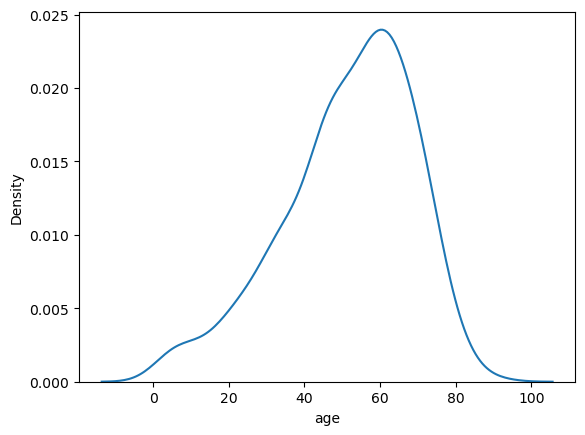

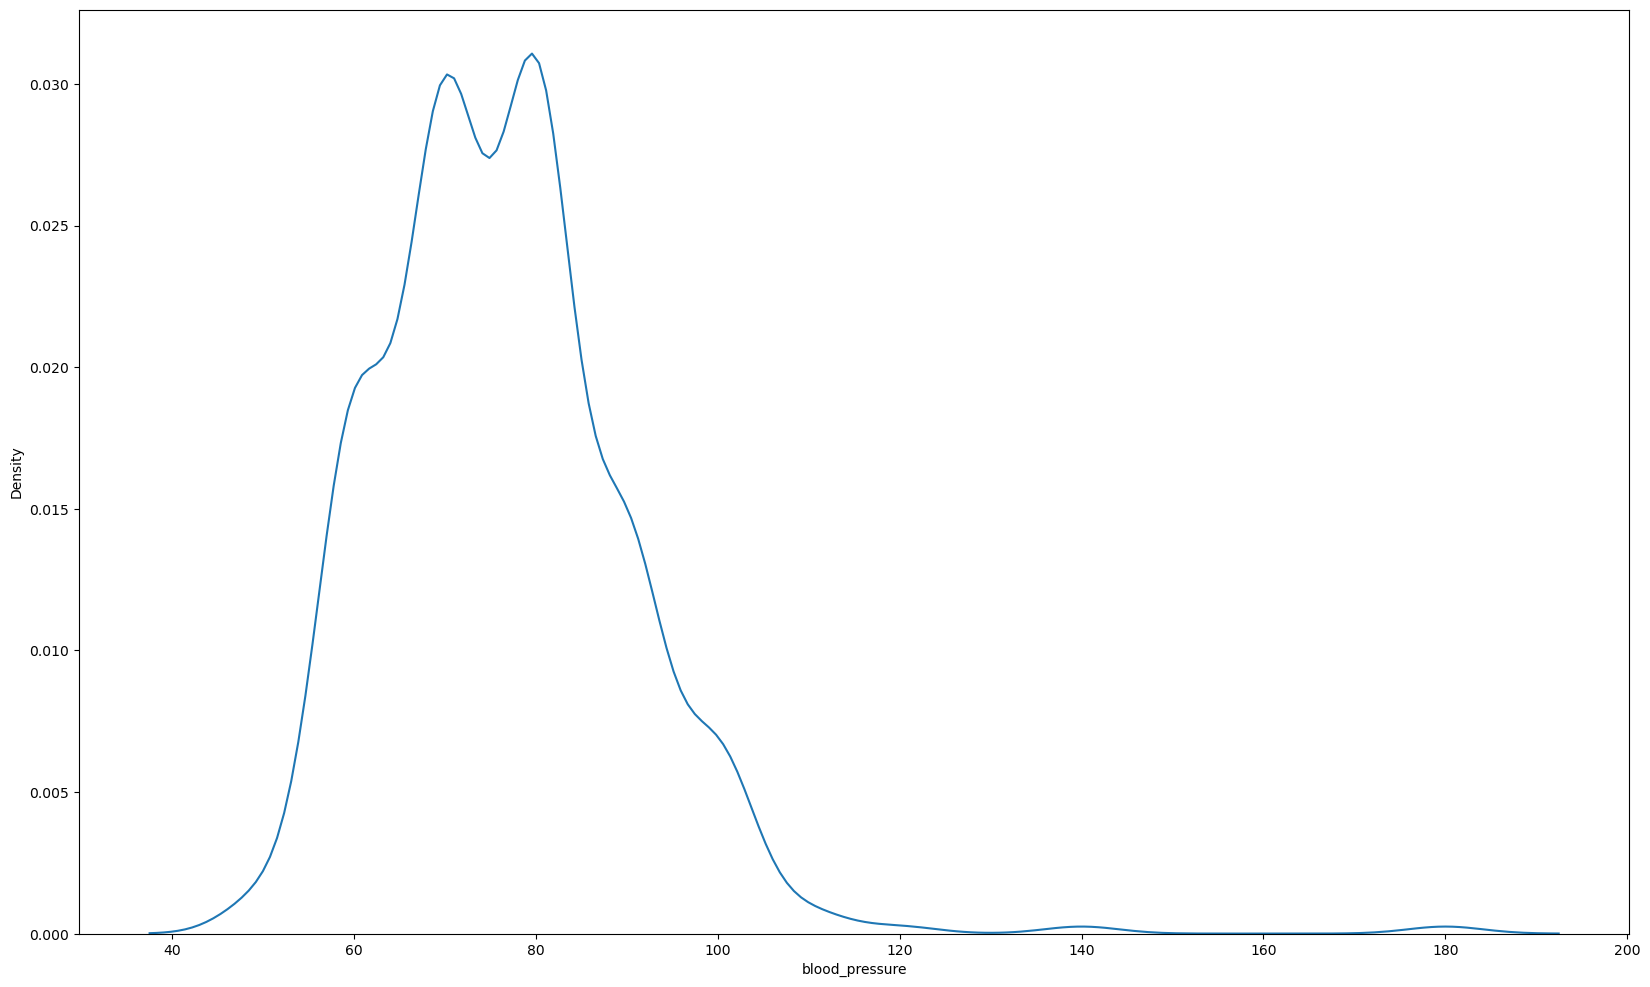

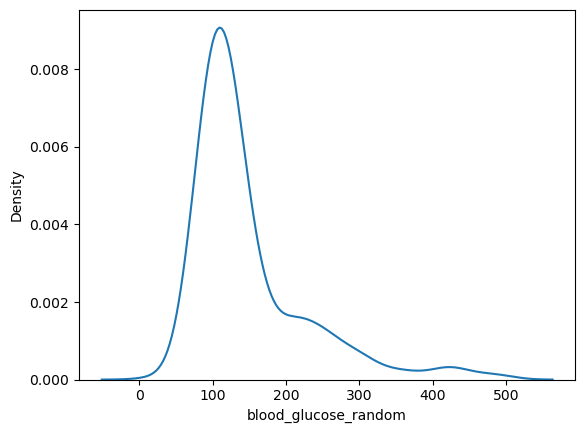

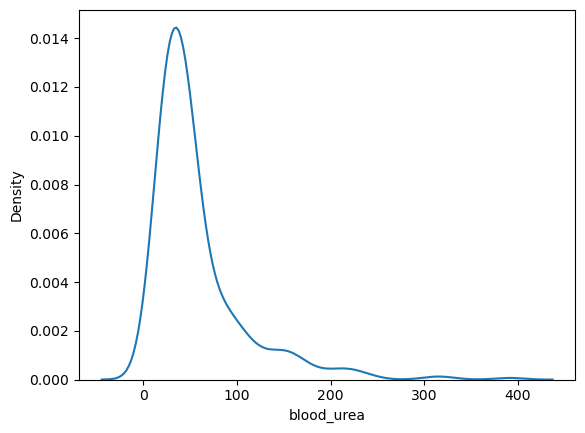

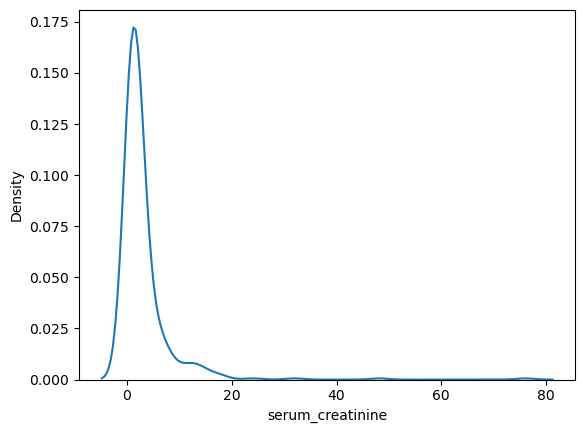

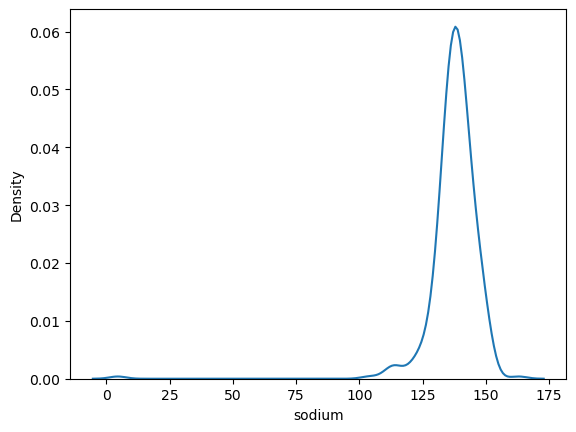

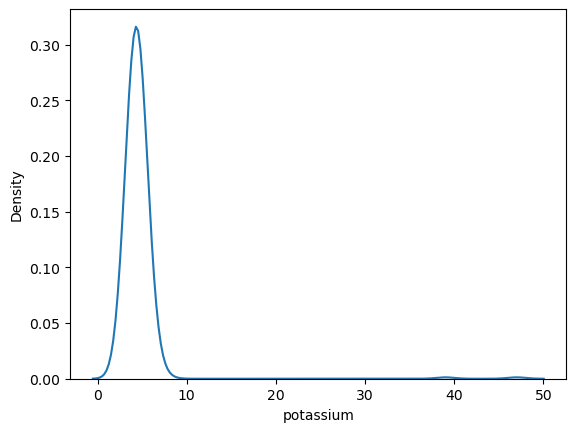

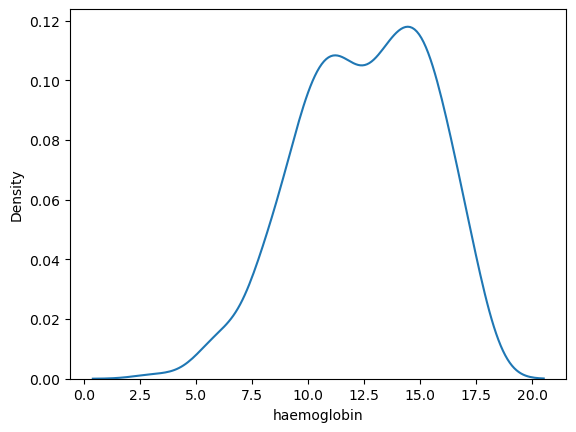

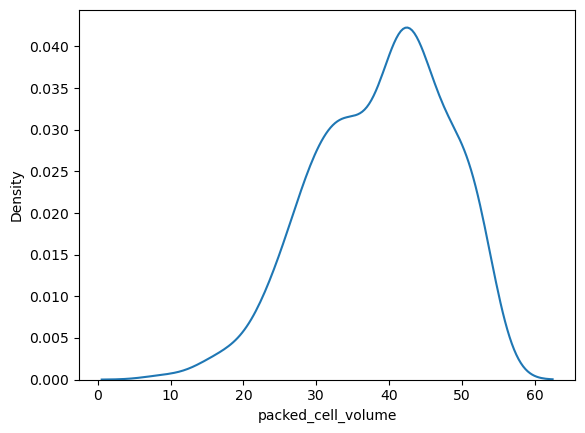

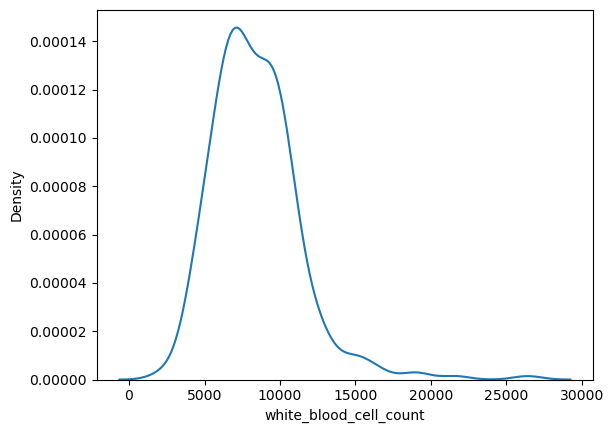

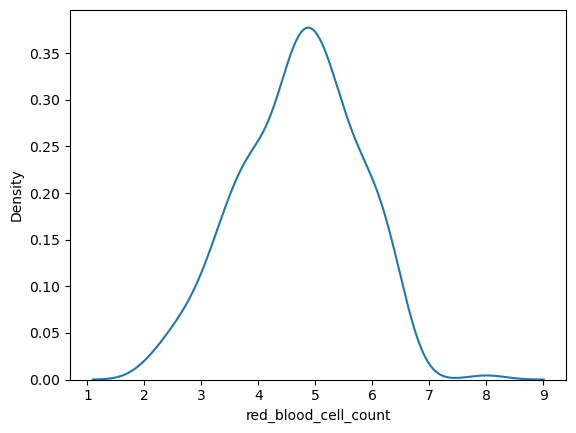

In [16]:
# checking numerical features distribution


plt.figure(figsize=(20,12))

# looping over num cols and checking its distribution
for i,j in enumerate(num_cols):
    plt.figure(i)
    sns.kdeplot(x=j,data=chronic_df)




In [17]:
# let's see the cols in cat col list

cat_cols


['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

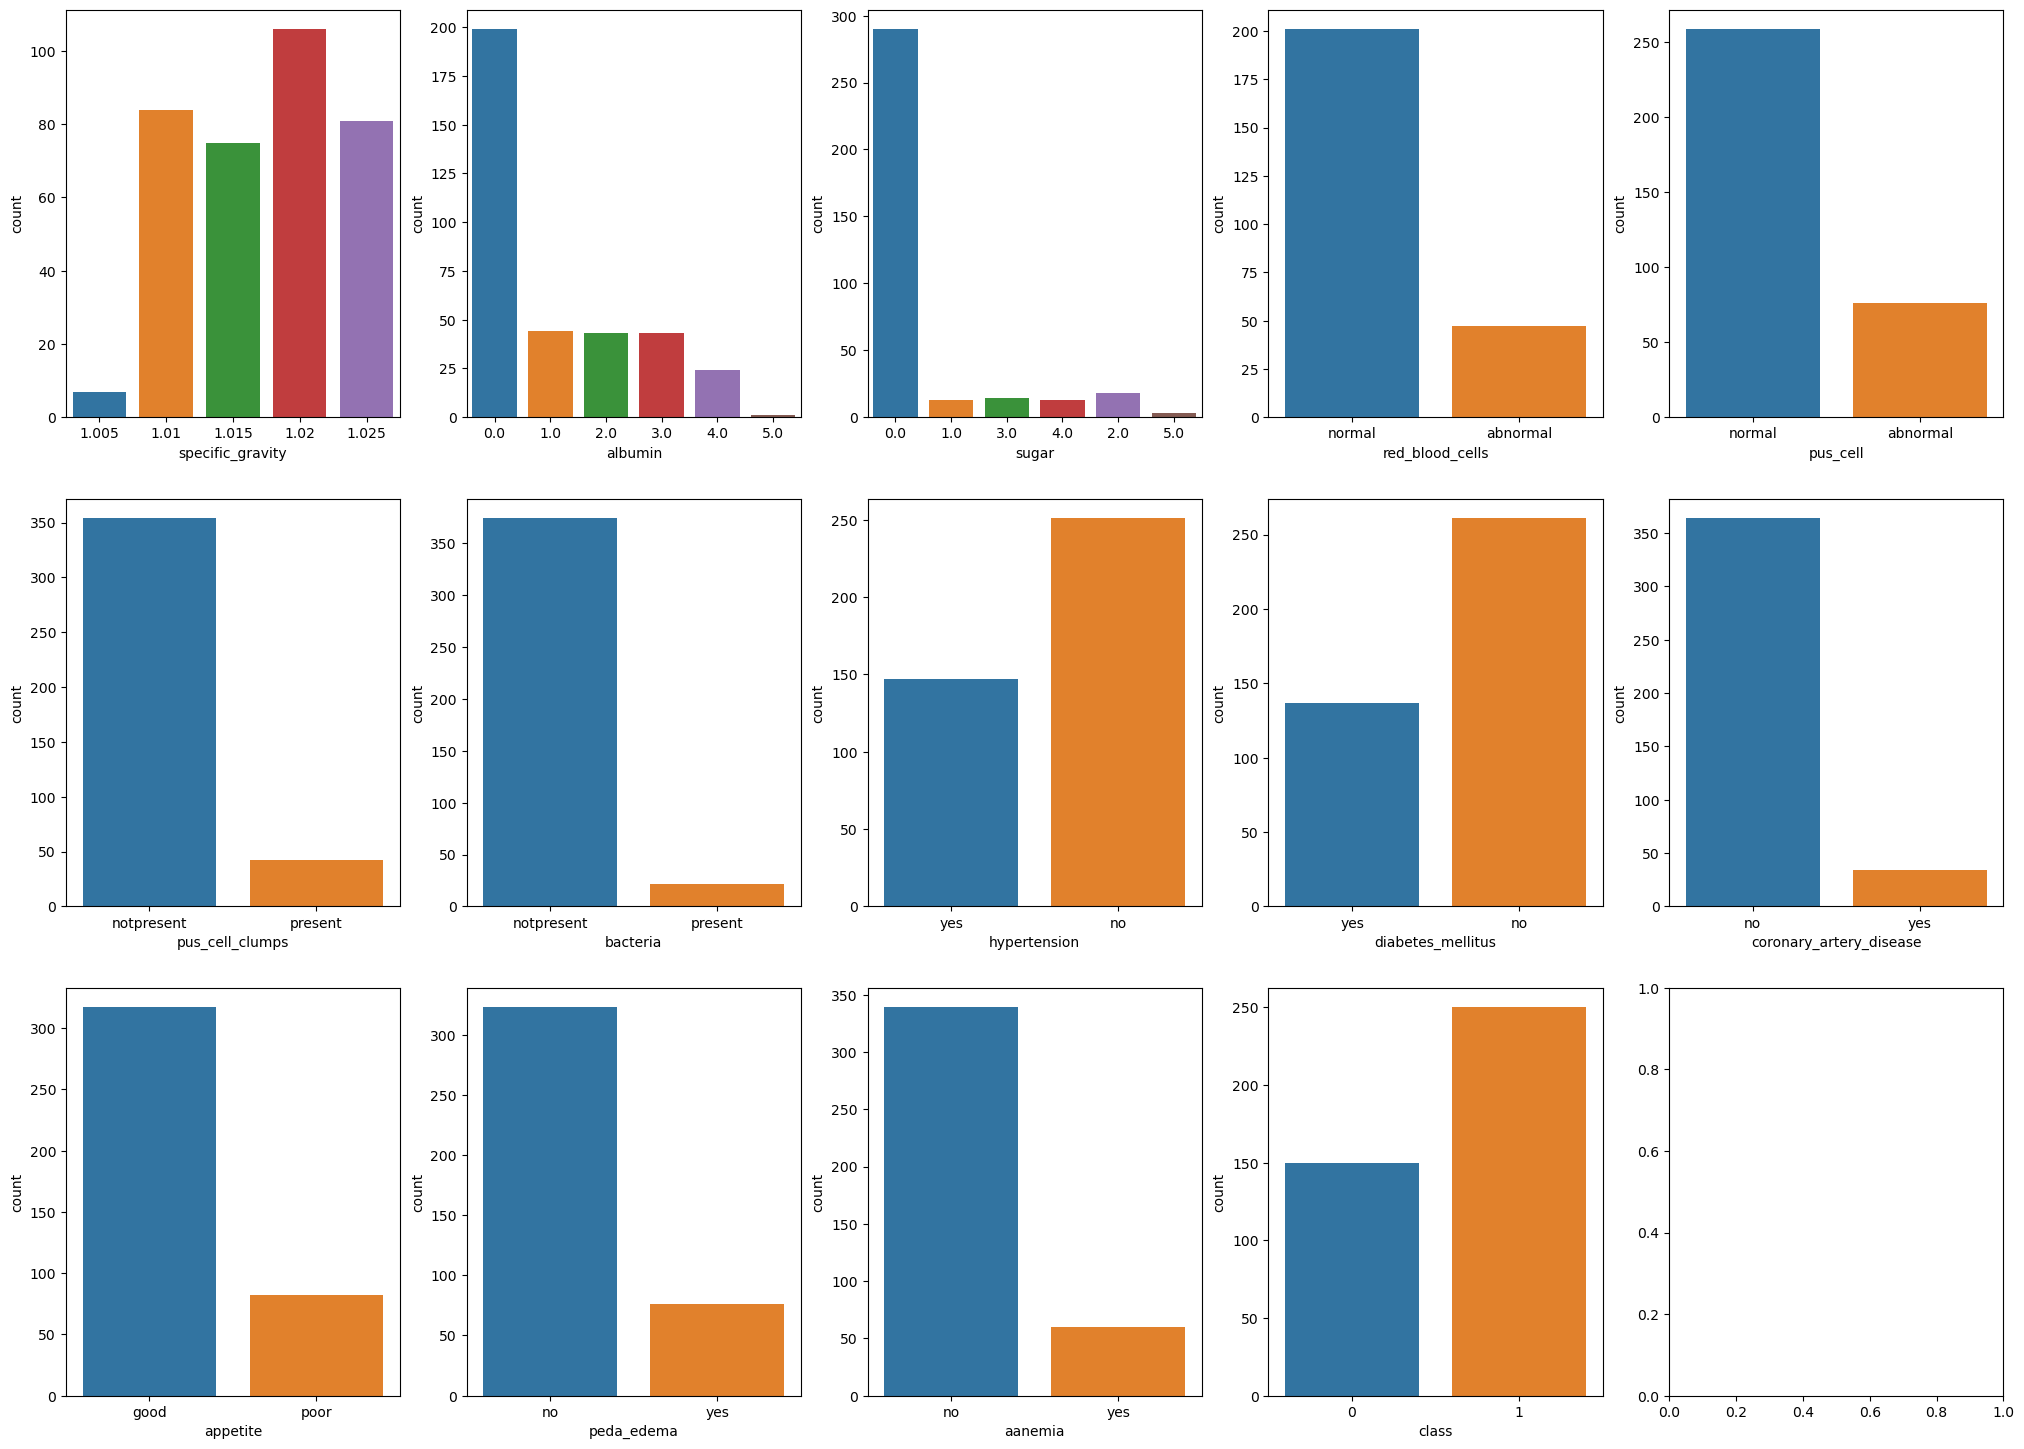

In [18]:

fig, axes = plt.subplots(3, 5, figsize=(25,18))


axes = axes.ravel()
for i,ax in zip(cat_cols,axes):
    sns.countplot(x=i,data=chronic_df,ax=ax)

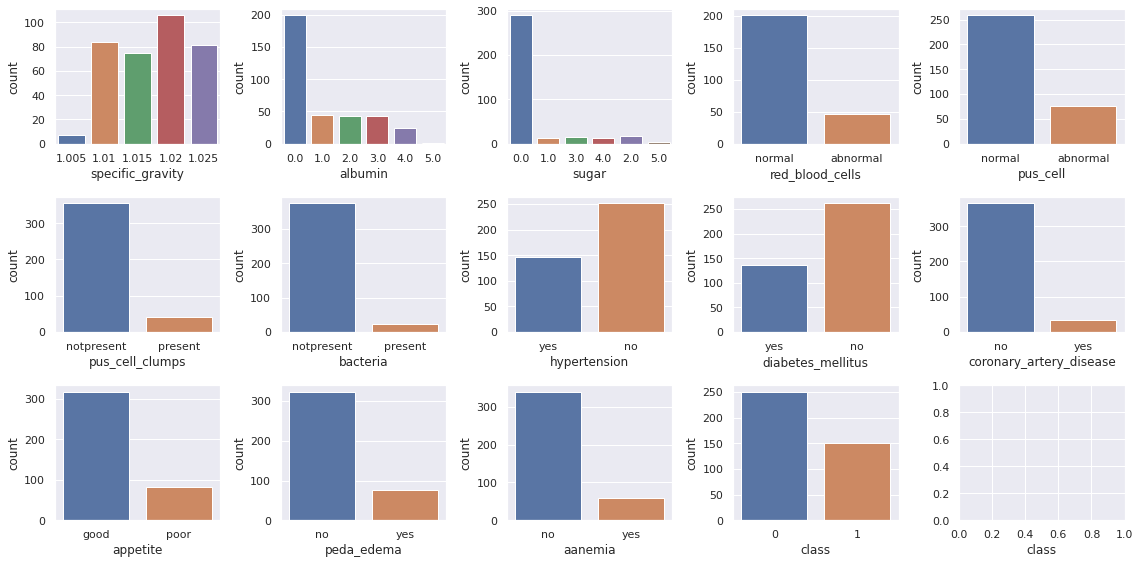

In [ ]:
# checking cat features distribution

# create the figure and axes

fig, axes = plt.subplots(3, 5, figsize=(16,8))


axes = axes.ravel()  # flattening the array makes indexing easier

# loop over cat cols and plot countplot








<AxesSubplot:>

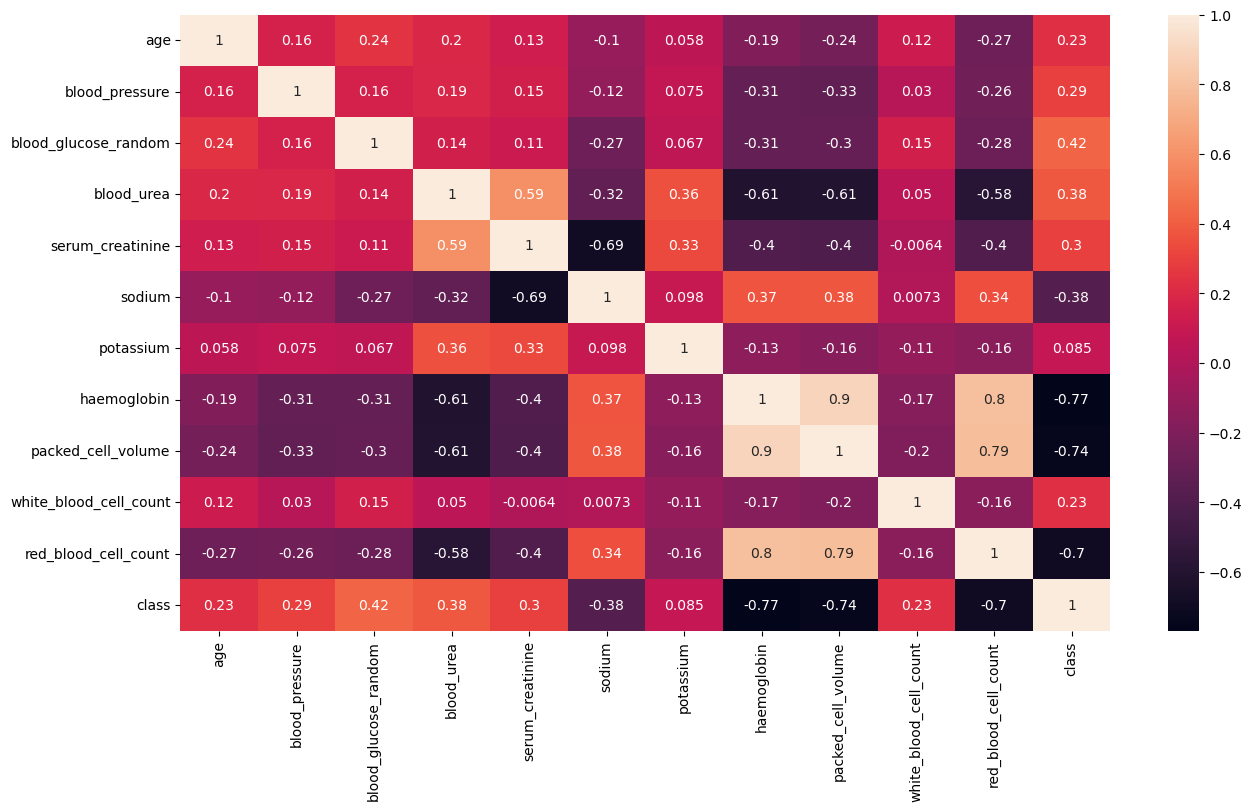

In [19]:
# correlated heatmap of data

plt.figure(figsize = (15, 8))
sns.heatmap(chronic_df.corr(),annot=True)






In [20]:
# let's check count of null values in whole df
chronic_df.isnull().sum()




age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [21]:
# let's check count of null values in num_cols
chronic_df[num_cols].isnull().sum()



age                         9
blood_pressure             12
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [22]:
# let's check count of null values in cat cols

chronic_df[cat_cols].isnull().sum()



specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

## **`Missing Value Treatment`**

In [23]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

# creating func for imputing random values
def random_value_imputation(feature):
    random_sample = chronic_df[feature].dropna().sample(chronic_df[feature].isna().sum())
    random_sample.index = chronic_df[chronic_df[feature].isna()].index
    chronic_df.loc[chronic_df[feature].isnull(), feature] = random_sample
    
# creating func for imputing most common value(modal value)
def impute_mode(feature):
    mode = chronic_df[feature].mode()[0]
    chronic_df[feature] = chronic_df[feature].fillna(mode)

In [24]:
# filling num_cols null values using random sampling method
for i in num_cols:
    random_value_imputation(i)




In [25]:
# let's check count of null values in num_cols again

chronic_df[num_cols].isna().sum()



age                       0
blood_pressure            0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [26]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')
cat_cols.remove('red_blood_cells')
cat_cols.remove('pus_cell')
for i in cat_cols:
    impute_mode(i)



In [27]:
# let's check count of null values in cat_cols again

chronic_df[cat_cols].isna().sum()

specific_gravity           0
albumin                    0
sugar                      0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [28]:
# check unique values in each cat col by looping over cat cols
cat_cols.extend(['red_blood_cells','pus_cell','class'])
j=0
for i in cat_cols:
    j+=1
    print(f'{j}. {i} has {chronic_df[i].unique()} categories')
    print('\n')


1. specific_gravity has [1.02  1.01  1.005 1.015 1.025] categories


2. albumin has [1. 4. 2. 3. 0. 5.] categories


3. sugar has [0. 3. 4. 1. 2. 5.] categories


4. pus_cell_clumps has ['notpresent' 'present'] categories


5. bacteria has ['notpresent' 'present'] categories


6. hypertension has ['yes' 'no'] categories


7. diabetes_mellitus has ['yes' 'no'] categories


8. coronary_artery_disease has ['no' 'yes'] categories


9. appetite has ['good' 'poor'] categories


10. peda_edema has ['no' 'yes'] categories


11. aanemia has ['no' 'yes'] categories


12. class has [1 0] categories


13. red_blood_cells has ['normal' 'abnormal'] categories


14. pus_cell has ['normal' 'abnormal'] categories


15. class has [1 0] categories




In [29]:
cat_cols

['specific_gravity',
 'albumin',
 'sugar',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class',
 'red_blood_cells',
 'pus_cell',
 'class']

In [30]:
# using labelencoder and applying on cat cols
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

oe1= OrdinalEncoder(categories=[['normal','abnormal']])
oe2 = OrdinalEncoder(categories=[['good','poor']])
le = LabelEncoder()

chronic_df['pus_cell'] = oe1.fit_transform(chronic_df[['pus_cell']])
chronic_df['red_blood_cells'] = oe1.fit_transform(chronic_df[['red_blood_cells']])

for i in cat_cols[3:]:
    chronic_df[i] = le.fit_transform(chronic_df[[i]])

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [31]:
# check chronic df after transforming cat cols
chronic_df.head()




,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,0,0,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,0,0,0,150.0,...,38.0,6000.0,5.0,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,0,0,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,0,0,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [32]:
chronic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int64  
 6   pus_cell                 400 non-null    int64  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [75]:
# Split data into features and target variables (X and y)
X = chronic_df.drop('class',axis=1)
y = chronic_df['class']

X.shape,y.shape


((400, 24), (400,))

In [34]:
# splitting data intp training and test set, so import train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=24,test_size=0.2)





## **`Model Building`**

In [35]:
# import KNeighborsClassifier, accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)



# accuracy score, confusion matrix and classification report of knn

knn_acc = knn.score(X_test,y_test)


print('Training Accuracy of KNN is ',accuracy_score(y_train,knn.predict(X_train)))
print('Testing Accuracy of KNN is ',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix :-')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report :-')
print(classification_report(y_test,y_pred))

Training Accuracy of KNN is  0.8125
Testing Accuracy of KNN is  0.5875


Confusion Matrix :-
[[20  8]
 [25 27]]


Classification Report :-
              precision    recall  f1-score   support

           0       0.44      0.71      0.55        28
           1       0.77      0.52      0.62        52

    accuracy                           0.59        80
   macro avg       0.61      0.62      0.58        80
weighted avg       0.66      0.59      0.60        80



C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

In [36]:
# import DecisionTreeClassifer
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dc = dtc.predict(X_test)


# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = dtc.score(X_test,y_test)
print('Training Accuracy of Decision-Tree is ',accuracy_score(y_train,dtc.predict(X_train)))
print('Testing Accuracy of Decision-Tree is ',accuracy_score(y_test,y_pred_dc))
print('\n')
print('Confusion Matrix for testing:-')
print(confusion_matrix(y_test,y_pred_dc))
print('Confusion Matrix for training:-')
print(confusion_matrix(y_train,dtc.predict(X_train)))
print('\n')
print('Classification Report :-')
print(classification_report(y_test,y_pred_dc))





Training Accuracy of Decision-Tree is  1.0
Testing Accuracy of Decision-Tree is  0.9375


Confusion Matrix for testing:-
[[27  1]
 [ 4 48]]
Confusion Matrix for training:-
[[122   0]
 [  0 198]]


Classification Report :-
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.98      0.92      0.95        52

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



In [41]:
# hyper parameter tuning of decision tree , import GridSearchCV

from sklearn.model_selection import GridSearchCV

param={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [ 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}



#grid_param 


# Apply gridsearchcv with cv = 5, n_jobs = -1, verbose = 1
grid_search_dtc =  GridSearchCV(dtc,param_grid=param,cv=5,n_jobs=-1,verbose=2,
                                return_train_score=True,scoring='accuracy')

grid_search_dtc.fit(X,y)




Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=2)

In [42]:
cv_res = pd.DataFrame(grid_search_dtc.cv_results_)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004001,0.001095,0.002200,4.000903e-04,gini,3,auto,1,2,best,...,0.9300,0.023184,589,0.950000,0.943750,0.918750,0.940625,0.962500,0.943125,0.014307
1,0.004401,0.001020,0.003401,1.855366e-03,gini,3,auto,1,2,random,...,0.8700,0.016956,853,0.856250,0.890625,0.884375,0.900000,0.818750,0.870000,0.029488
2,0.004401,0.000799,0.002001,2.780415e-07,gini,3,auto,1,3,best,...,0.9375,0.032596,491,0.934375,0.931250,0.959375,0.978125,0.953125,0.951250,0.017185
3,0.003894,0.000215,0.002296,3.963953e-04,gini,3,auto,1,3,random,...,0.8575,0.087178,877,0.865625,0.834375,0.790625,0.881250,0.946875,0.863750,0.051826
4,0.003190,0.000538,0.002802,7.467891e-04,gini,3,auto,1,5,best,...,0.9375,0.063246,491,0.981250,0.968750,0.909375,0.925000,0.925000,0.941875,0.027923


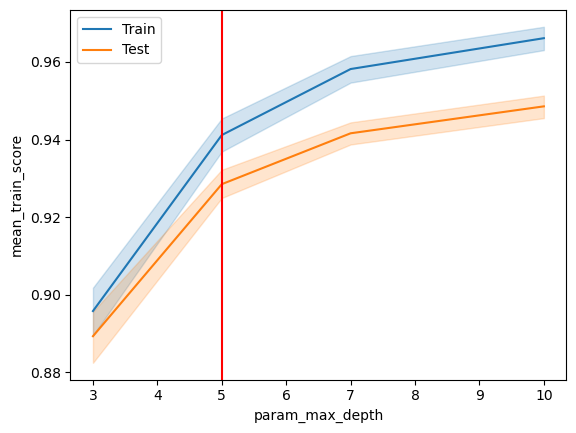

In [43]:
sns.lineplot(x='param_max_depth',y='mean_train_score',data=cv_res,label='Train')
sns.lineplot(x='param_max_depth',y='mean_test_score',data=cv_res,label='Test')
plt.axvline(5,color='red')
plt.legend()

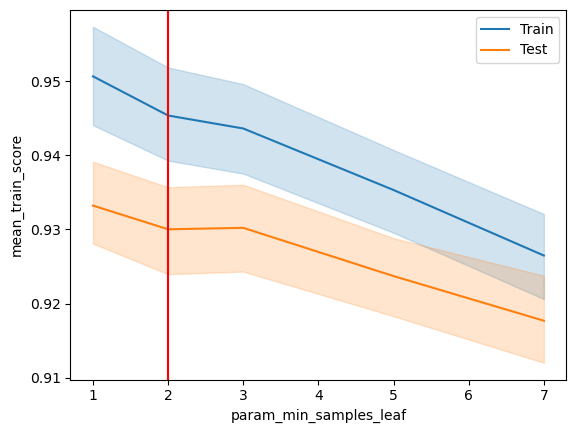

In [44]:
sns.lineplot(x='param_min_samples_leaf',y='mean_train_score',data=cv_res,label='Train')
sns.lineplot(x='param_min_samples_leaf',y='mean_test_score',data=cv_res,label='Test')
plt.axvline(2,color='red')
plt.legend()

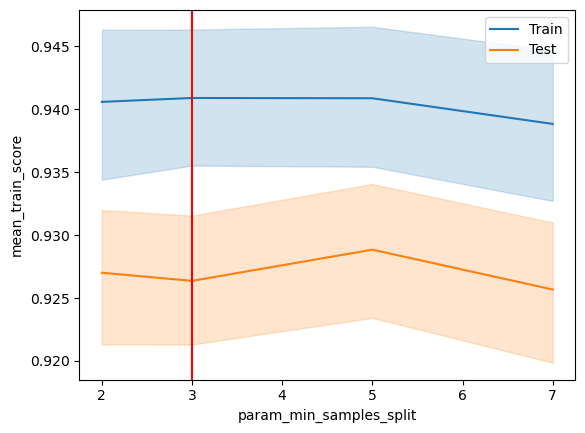

In [45]:
sns.lineplot(x='param_min_samples_split',y='mean_train_score',data=cv_res,label='Train')
sns.lineplot(x='param_min_samples_split',y='mean_test_score',data=cv_res,label='Test')
plt.axvline(3,color='red')
plt.legend()

In [46]:
# print best parameters and best score in grid search dtc
print('Best Parameters',grid_search_dtc.best_params_)
print('The best Score is ',grid_search_dtc.best_score_)



Best Parameters {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
The best Score is  0.99


In [47]:
# storing best estimator

dtc = DecisionTreeClassifier(**{'criterion': 'entropy', 'max_depth': 5, 
                                'max_features': 'sqrt', 'min_samples_leaf': 2, 
                                'min_samples_split': 3, 'splitter': 'best'})


dtc.fit(X_train,y_train)
y_pred_dc = dtc.predict(X_test)
# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = dtc.score(X_test,y_test)
print('Training Accuracy of Decision-Tree is ',accuracy_score(y_train,dtc.predict(X_train)))
print('Testing Accuracy of Decision-Tree is ',accuracy_score(y_test,y_pred_dc))
print('\n')
print('Confusion Matrix for testing:-')
print(confusion_matrix(y_test,y_pred_dc))
print('Confusion Matrix for training:-')
print(confusion_matrix(y_train,dtc.predict(X_train)))
print('\n')
print('Classification Report :-')
print(classification_report(y_test,y_pred_dc))







Training Accuracy of Decision-Tree is  0.978125
Testing Accuracy of Decision-Tree is  0.9625


Confusion Matrix for testing:-
[[25  3]
 [ 0 52]]
Confusion Matrix for training:-
[[121   1]
 [  6 192]]


Classification Report :-
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        28
           1       0.95      1.00      0.97        52

    accuracy                           0.96        80
   macro avg       0.97      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80



In [48]:
# import RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train,y_train)

y_pred_rd= rd_clf.predict(X_test)
# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = rd_clf.score(X_test,y_test)
print('Training Accuracy of Decision-Tree is ',accuracy_score(y_train,rd_clf.predict(X_train)))
print('Testing Accuracy of Decision-Tree is ',accuracy_score(y_test,y_pred_rd))
print('\n')
print('Confusion Matrix for testing:-')
print(confusion_matrix(y_test,y_pred_rd))
print('Confusion Matrix for training:-')
print(confusion_matrix(y_train,rd_clf.predict(X_train)))
print('\n')
print('Classification Report :-')
print(classification_report(y_test,y_pred_rd))





Training Accuracy of Decision-Tree is  1.0
Testing Accuracy of Decision-Tree is  0.9875


Confusion Matrix for testing:-
[[27  1]
 [ 0 52]]
Confusion Matrix for training:-
[[122   0]
 [  0 198]]


Classification Report :-
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [49]:
# import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=50)
ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = ada.score(X_test,y_test)
print('Training Accuray of AdaBoost Classifier is ',accuracy_score(y_train,ada.predict(X_train)))
print('Testing Accuracy of AdaBoost Classifier is ',accuracy_score(y_test,y_pred_ada))
print('\n')
print('Confusion Matrix:- ')
print(confusion_matrix(y_test,y_pred_ada))
print(confusion_matrix(y_train,ada.predict(X_train)))
print('\n')
print('calssification Report ')
print(classification_report(y_test,y_pred_ada))
print(classification_report(y_train,ada.predict(X_train)))
      

Training Accuray of AdaBoost Classifier is  1.0
Testing Accuracy of AdaBoost Classifier is  1.0


Confusion Matrix:- 
[[28  0]
 [ 0 52]]
[[122   0]
 [  0 198]]


calssification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [52]:
# import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_pred_gb = gb.predict(X_test)
# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = gb.score(X_test,y_test)
print('Training Accuray of GradientBoost Classifier is ',accuracy_score(y_train,gb.predict(X_train)))
print('Testing Accuracy of GradientBoost Classifier is ',accuracy_score(y_test,y_pred_gb))
print('\n')
print('Confusion Matrix:- ')
print('Test')
print(confusion_matrix(y_test,y_pred_gb),'\n')
print('Train')
print(confusion_matrix(y_train,gb.predict(X_train)))
print('\n')
print('calssification Report ')
print('Test')
print(classification_report(y_test,y_pred_gb),'\n')
print('Train')
print(classification_report(y_train,gb.predict(X_train)))






Training Accuray of GradientBoost Classifier is  1.0
Testing Accuracy of GradientBoost Classifier is  0.9625


Confusion Matrix:- 
Test
[[28  0]
 [ 3 49]] 

Train
[[122   0]
 [  0 198]]


calssification Report 
Test
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        28
           1       1.00      0.94      0.97        52

    accuracy                           0.96        80
   macro avg       0.95      0.97      0.96        80
weighted avg       0.97      0.96      0.96        80
 

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [54]:
param={'max_depth':[2,3,4,5,6],
      'subsample':[0.9,0.8,0.4,0.1],
      'max_features':[0.1,],
      'n_estimators':[50,100,200,400,]}
gs= GridSearchCV(GradientBoostingClassifier(),param_grid=param,cv=5,scoring='accuracy',n_jobs=-1,return_train_score=True)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [0.9, 0.7, 0.3, 0.1],
                         'n_estimators': [50, 100, 200, 400, 600],
                         'subsample': [0.9, 0.8, 0.4, 0.1]},
             return_train_score=True, scoring='accuracy')

In [56]:
cv_res_gb = pd.DataFrame(gs.cv_results_)
cv_res_gb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.084622,0.004226,0.005801,3.124591e-03,2,0.9,50,0.9,"{'max_depth': 2, 'max_features': 0.9, 'n_estim...",0.968750,...,0.975000,0.007655,285,1.000000,1.000000,1.00000,0.996094,1.000000,0.999219,0.001563
1,0.081621,0.004586,0.003801,7.485704e-04,2,0.9,50,0.8,"{'max_depth': 2, 'max_features': 0.9, 'n_estim...",0.984375,...,0.984375,0.000000,66,1.000000,0.996094,1.00000,1.000000,1.000000,0.999219,0.001563
2,0.066854,0.001624,0.003601,4.902908e-04,2,0.9,50,0.4,"{'max_depth': 2, 'max_features': 0.9, 'n_estim...",0.984375,...,0.978125,0.007655,219,1.000000,1.000000,1.00000,1.000000,0.996094,0.999219,0.001563
3,0.054572,0.000403,0.005801,3.600836e-03,2,0.9,50,0.1,"{'max_depth': 2, 'max_features': 0.9, 'n_estim...",0.937500,...,0.956250,0.022964,374,0.988281,0.984375,0.96875,0.980469,0.980469,0.980469,0.006536
4,0.153009,0.007582,0.004001,2.780415e-07,2,0.9,100,0.9,"{'max_depth': 2, 'max_features': 0.9, 'n_estim...",0.984375,...,0.981250,0.006250,134,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000


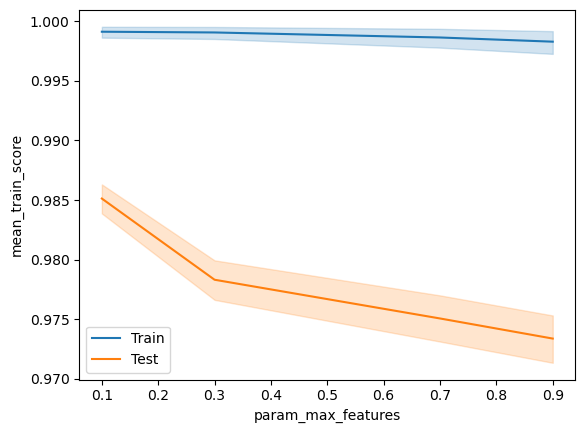

In [57]:
sns.lineplot(x='param_max_features',y='mean_train_score',data=cv_res_gb,label='Train')
sns.lineplot(x='param_max_features',y='mean_test_score',data=cv_res_gb,label='Test')
plt.legend()

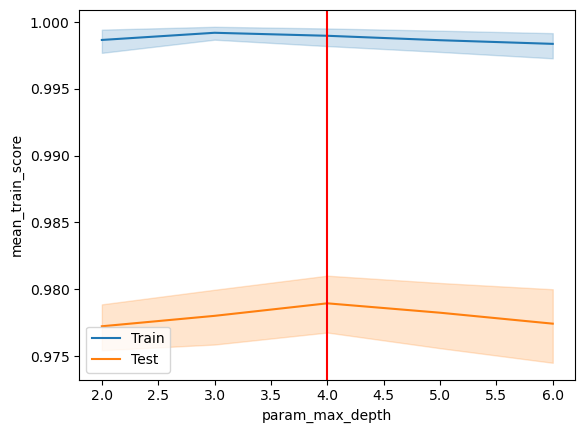

In [59]:
sns.lineplot(x='param_max_depth',y='mean_train_score',data=cv_res_gb,label='Train')
sns.lineplot(x='param_max_depth',y='mean_test_score',data=cv_res_gb,label='Test')
plt.axvline(4,color='red')
plt.legend()

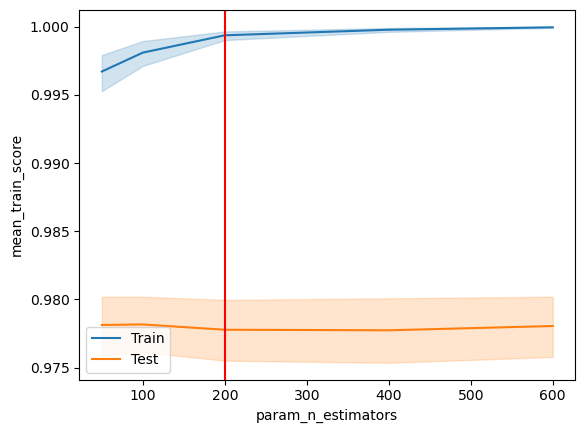

In [62]:
sns.lineplot(x='param_n_estimators',y='mean_train_score',data=cv_res_gb,label='Train')
sns.lineplot(x='param_n_estimators',y='mean_test_score',data=cv_res_gb,label='Test')
plt.axvline(200,color='red')
plt.legend()

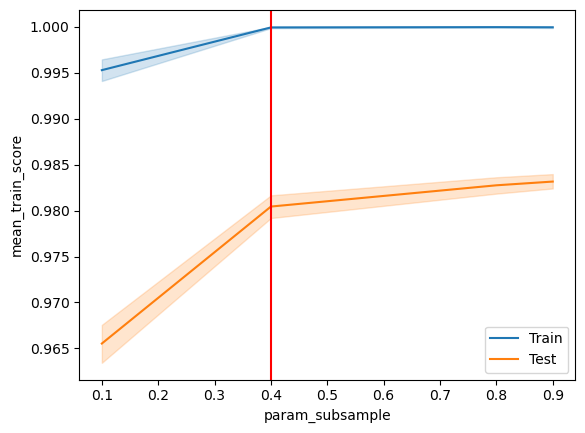

In [64]:
sns.lineplot(x='param_subsample',y='mean_train_score',data=cv_res_gb,label='Train')
sns.lineplot(x='param_subsample',y='mean_test_score',data=cv_res_gb,label='Test')
plt.axvline(0.4,color='red')
plt.legend()

In [55]:
print('Best param',gs.best_params_)
print('the best score',gs.best_score_)

Best param {'max_depth': 5, 'max_features': 0.1, 'n_estimators': 400, 'subsample': 0.4}
the best score 0.996875


In [65]:
# using max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200
gb = GradientBoostingClassifier(**{'max_depth': 5, 'max_features': 0.1, 'n_estimators': 200, 'subsample': 0.4})

gb.fit(X_train,y_train)
y_pred_gb=gb.predict(X_test)

# accuracy score, confusion matrix and classification report of stochastic gradient boosting classifier

gb_acc = gb.score(X_test,y_test)
print('Training Accuray of GradientBoost Classifier is ',accuracy_score(y_train,gb.predict(X_train)))
print('Testing Accuracy of GradientBoost Classifier is ',accuracy_score(y_test,y_pred_gb))
print('\n')
print('Confusion Matrix:- ')
print('Test')
print(confusion_matrix(y_test,y_pred_gb),'\n')
print('Train')
print(confusion_matrix(y_train,gb.predict(X_train)))
print('\n')
print('calssification Report ')
print('Test')
print(classification_report(y_test,y_pred_gb),'\n')
print('Train')
print(classification_report(y_train,gb.predict(X_train)))








Training Accuray of GradientBoost Classifier is  1.0
Testing Accuracy of GradientBoost Classifier is  1.0


Confusion Matrix:- 
Test
[[28  0]
 [ 0 52]] 

Train
[[122   0]
 [  0 198]]


calssification Report 
Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80
 

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [66]:
# import XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = xgb.score(X_test,y_test)
xgb_acc = xgb.score(X_test,y_test)
print('Training Accuray of XGBoost Classifier is ',accuracy_score(y_train,xgb.predict(X_train)))
print('Testing Accuracy of XGBoost Classifier is ',accuracy_score(y_test,y_pred_xgb))
print('\n')
print('Confusion Matrix:- ')
print('Test')
print(confusion_matrix(y_test,y_pred_xgb),'\n')
print('Train')
print(confusion_matrix(y_train,xgb.predict(X_train)))
print('\n')
print('calssification Report ')
print('Test')
print(classification_report(y_test,y_pred_xgb),'\n')
print('Train')
print(classification_report(y_train,xgb.predict(X_train)))









Training Accuray of XGBoost Classifier is  1.0
Testing Accuracy of XGBoost Classifier is  0.975


Confusion Matrix:- 
Test
[[28  0]
 [ 2 50]] 

Train
[[122   0]
 [  0 198]]


calssification Report 
Test
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.96      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80
 

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [68]:
# import ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred_etc = etc.predict(X_test)


# accuracy score, confusion matrix and classification report of extra trees classifier

etc_acc =etc.score(X_test,y_test) 

print('Training Accuray of ExtraTree Classifier is ',accuracy_score(y_train,etc.predict(X_train)))
print('Testing Accuracy of ExtraTree Classifier is ',accuracy_score(y_test,y_pred_etc))
print('\n')
print('Confusion Matrix:- ')
print('Test')
print(confusion_matrix(y_test,y_pred_etc),'\n')
print('Train')
print(confusion_matrix(y_train,etc.predict(X_train)))
print('\n')
print('calssification Report ')
print('Test')
print(classification_report(y_test,y_pred_etc),'\n')
print('Train')
print(classification_report(y_train,etc.predict(X_train)))








Training Accuray of ExtraTree Classifier is  1.0
Testing Accuracy of ExtraTree Classifier is  0.975


Confusion Matrix:- 
Test
[[26  2]
 [ 0 52]] 

Train
[[122   0]
 [  0 198]]


calssification Report 
Test
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80
 

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [69]:
# comparing all models accuracy by creating a df

model_name = ['KNN','Decision_Tree_Classifier','Random_Forest_Classifier','Extra_Tree_Classifier','AdaBoost Classifier',
             'GradientBoosting Classifier','XGBoost classifier']

score_num = [knn_acc,dtc_acc,rd_clf_acc,etc_acc,ada_acc,gb_acc,xgb_acc]



models = pd.DataFrame({'Model':model_name,'Score':score_num})



models.sort_values(by='Score',ascending=False)






,Model,Score
4,AdaBoost Classifier,1.0000
5,GradientBoosting Classifier,1.0000
2,Random_Forest_Classifier,0.9875
3,Extra_Tree_Classifier,0.9750
6,XGBoost classifier,0.9750
1,Decision_Tree_Classifier,0.9625
0,KNN,0.5875


## Best Model is by AdaBoost Classifier and Gradient Boost Classifier

In [70]:
final_model = AdaBoostClassifier()
final_model.fit(X_train,y_train)

AdaBoostClassifier()

In [72]:
y_pred = final_model.predict(X_test)
final_acc = final_model.score(X_test,y_test)
print('Training Accuray of AdaBoost Classifier is ',accuracy_score(y_train,final_model.predict(X_train)))
print('Testing Accuracy of AdaBoost Classifier is ',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:- ')
print(confusion_matrix(y_test,y_pred))
print(confusion_matrix(y_train,final_model.predict(X_train)))
print('\n')
print('calssification Report ')
print(classification_report(y_test,y_pred))
print(classification_report(y_train,final_model.predict(X_train)))

Training Accuray of AdaBoost Classifier is  1.0
Testing Accuracy of AdaBoost Classifier is  1.0


Confusion Matrix:- 
[[28  0]
 [ 0 52]]
[[122   0]
 [  0 198]]


calssification Report 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       122
           1       1.00      1.00      1.00       198

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



In [73]:
chronic_df.to_csv('ChronicKidney_dataset.csv')

In [74]:
import pickle as p
p.dump(final_model,open('chronic_kidney_model.pkl','wb'))